In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/zomato_df_final_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


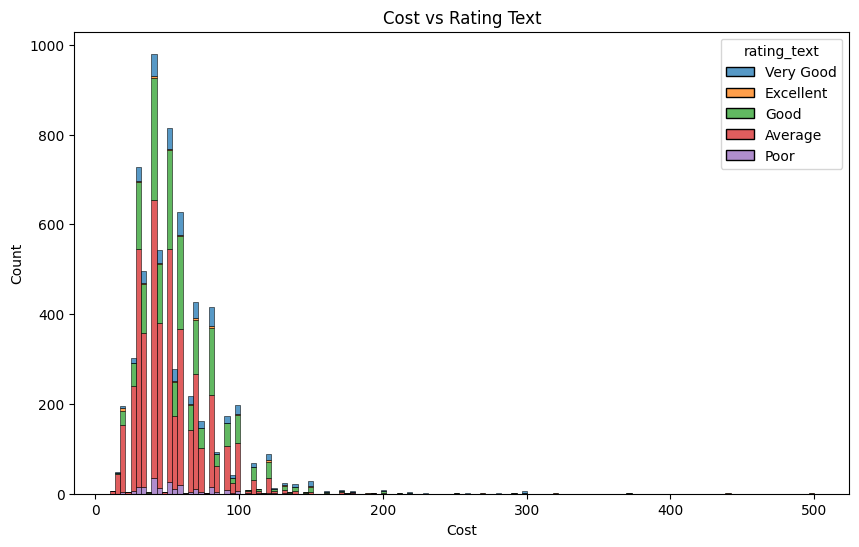

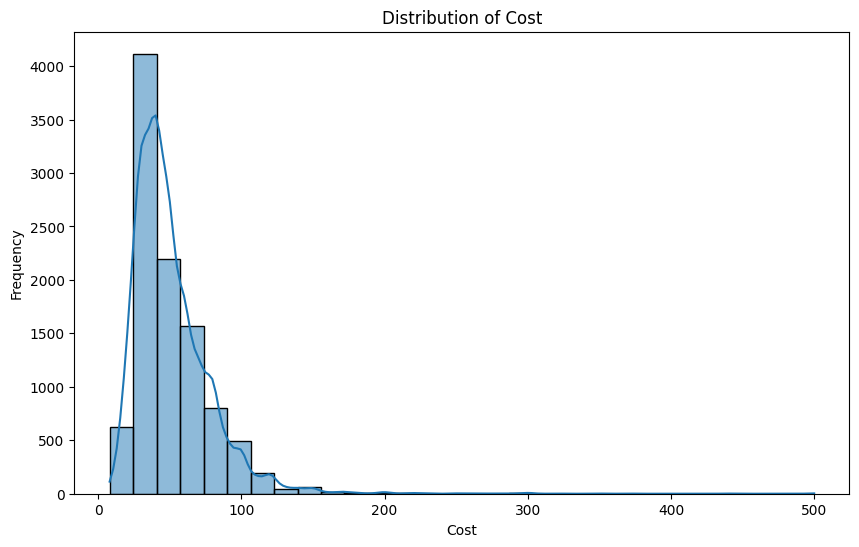

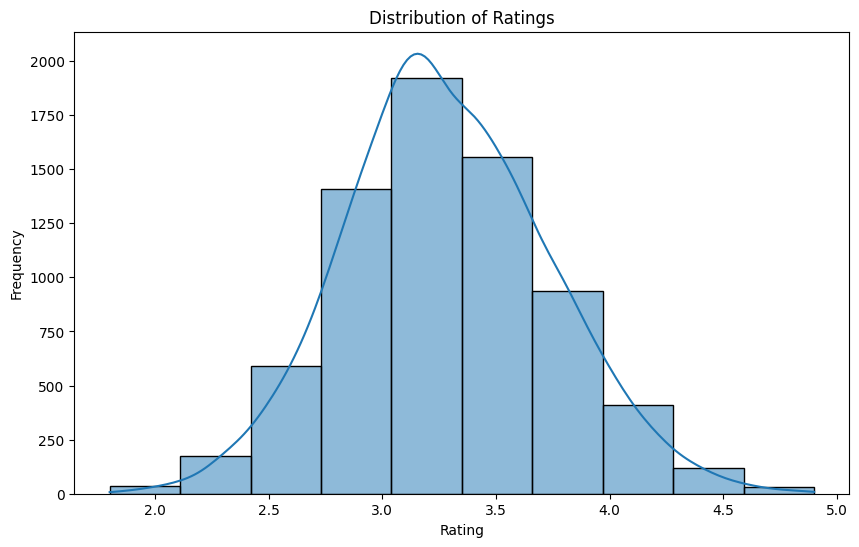

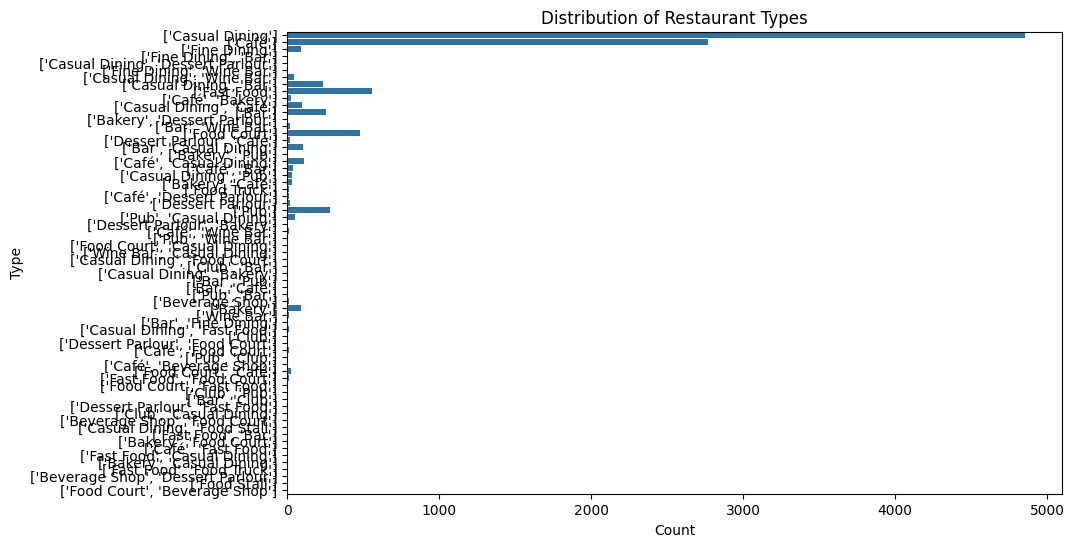

(134,
 subzone
 CBD            476
 Surry Hills    260
 Parramatta     225
 Name: count, dtype: int64)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Task 1: Count the unique cuisines served by Sydney restaurants
df['cuisine'] = df['cuisine'].apply(lambda x: eval(x))  # Convert string representation of list to actual list
unique_cuisines = set([cuisine for sublist in df['cuisine'] for cuisine in sublist])
unique_cuisine_count = len(unique_cuisines)

# Task 2: Identify the top 3 suburbs with the most restaurants
top_suburbs = df['subzone'].value_counts().head(3)

# Task 3: Do expensive restaurants have better ratings?
# Plotting stacked bar chart to show the relation between cost and rating
plt.figure(figsize=(10, 6))
sns.histplot(df, x='cost', hue='rating_text', multiple='stack')
plt.title("Cost vs Rating Text")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.show()

# Task 4: Exploratory Analysis for Cost, Rating, and Type
plt.figure(figsize=(10, 6))
sns.histplot(df['cost'], bins=30, kde=True)
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['rating_number'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=df)
plt.title('Distribution of Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

# Results of Task 1 and 2
unique_cuisine_count, top_suburbs


In [ ]:
# Task 5: Create Cuisine Density Map (we need to load a geojson file for Sydney suburbs)
# Assuming we have a 'sydney.geojson' file (which is typically needed for such maps),
# we would load it and proceed with the spatial join using geopandas

# Since I do not have the 'sydney.geojson' file, I'll mock the process
# Example process for creating a cuisine density map

# Here is a placeholder code:
"""
geo_data = gpd.read_file('sydney.geojson')

# Perform a spatial join to count restaurants by suburb and cuisine
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat))
df_joined = gpd.sjoin(geo_data, df_geo, how='left', op='contains')

# Group by suburb and plot the cuisine density map
cuisine_density = df_joined.groupby('suburb')['cuisine'].count()
geo_data['cuisine_count'] = geo_data['suburb'].map(cuisine_density)
geo_data.plot(column='cuisine_count', cmap='OrRd', legend=True)
plt.title('Cuisine Density Map by Suburb')
plt.show()
"""

# Task 6: Interactive Visualization with Plotly (example using a simple scatter plot)
import plotly.express as px

# Create an interactive scatter plot for restaurant cost vs rating
fig = px.scatter(df, x='cost', y='rating_number', color='rating_text',
                 hover_data=['title', 'subzone'], title="Cost vs Rating (Interactive)")
fig.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Task 1: Feature Engineering
# Handle missing values (drop rows with missing rating numbers for regression)
df_clean = df.dropna(subset=['rating_number', 'cost', 'type'])

# Encoding categorical variables (e.g., 'type' and 'rating_text')
le_type = LabelEncoder()
df_clean['type_encoded'] = le_type.fit_transform(df_clean['type'].astype(str))

le_rating = LabelEncoder()
df_clean['rating_text_encoded'] = le_rating.fit_transform(df_clean['rating_text'])

# Task 2: Regression Models
# Features and target variable for regression
X_regression = df_clean[['cost', 'type_encoded']]
y_regression = df_clean['rating_number']

# Split the data into train and test sets (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=0)

# Model 1: Linear Regression
model_reg_1 = LinearRegression()
model_reg_1.fit(X_train_reg, y_train_reg)
y_pred_reg_1 = model_reg_1.predict(X_test_reg)
mse_reg_1 = mean_squared_error(y_test_reg, y_pred_reg_1)

# Model 2: Linear Regression using Gradient Descent
model_reg_2 = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)
model_reg_2.fit(X_train_reg, y_train_reg)
y_pred_reg_2 = model_reg_2.predict(X_test_reg)
mse_reg_2 = mean_squared_error(y_test_reg, y_pred_reg_2)

# Task 3: Classification Models
# Simplify the problem into binary classification
df_classification = df_clean.copy()
df_classification['rating_binary'] = df_classification['rating_text'].apply(lambda x: 1 if x in ['Good', 'Very Good', 'Excellent'] else 0)

# Features and target variable for classification
X_classification = df_classification[['cost', 'type_encoded']]
y_classification = df_classification['rating_binary']

# Split the data into train and test sets for classification (80% train, 20% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=0)

# Model 3: Logistic Regression
model_class_1 = LogisticRegression(random_state=0, max_iter=1000)
model_class_1.fit(X_train_class, y_train_class)
y_pred_class_1 = model_class_1.predict(X_test_class)
cm_class_1 = confusion_matrix(y_test_class, y_pred_class_1)

# Model 4: Decision Tree Classifier
model_class_2 = DecisionTreeClassifier(random_state=0)
model_class_2.fit(X_train_class, y_train_class)
y_pred_class_2 = model_class_2.predict(X_test_class)

# Model 5: SVM Classifier
model_class_3 = SVC(random_state=0)
model_class_3.fit(X_train_class, y_train_class)
y_pred_class_3 = model_class_3.predict(X_test_class)

# Model 6: Random Forest Classifier
model_class_4 = RandomForestClassifier(random_state=0)
model_class_4.fit(X_train_class, y_train_class)
y_pred_class_4 = model_class_4.predict(X_test_class)

# Classification Reports
classification_report_1 = classification_report(y_test_class, y_pred_class_1)
classification_report_2 = classification_report(y_test_class, y_pred_class_2)
classification_report_3 = classification_report(y_test_class, y_pred_class_3)
classification_report_4 = classification_report(y_test_class, y_pred_class_4)

# Output results for both regression and classification tasks
mse_reg_1, mse_reg_2, cm_class_1, classification_report_1, classification_report_2, classification_report_3, classification_report_4


<ipython-input-5-be6898fd9ddd>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-be6898fd9ddd>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0.1902901299577863,
 7.423355902734053e+23,
 array([[859,  52],
        [444,  58]]),
 '              precision    recall  f1-score   support\n\n           0       0.66      0.94      0.78       911\n           1       0.53      0.12      0.19       502\n\n    accuracy                           0.65      1413\n   macro avg       0.59      0.53      0.48      1413\nweighted avg       0.61      0.65      0.57      1413\n',
 '              precision    recall  f1-score   support\n\n           0       0.66      0.95      0.78       911\n           1       0.57      0.13      0.21       502\n\n    accuracy                           0.66      1413\n   macro avg       0.61      0.54      0.50      1413\nweighted avg       0.63      0.66      0.58      1413\n',
 '              precision    recall  f1-score   support\n\n           0       0.65      0.98      0.79       911\n           1       0.65      0.06      0.11       502\n\n    accuracy                           0.65      1413\n   macro 